<a href="https://colab.research.google.com/github/manasik29/Assignment_Forecasting_Airline_Passengers_Seats/blob/main/Forecasting_Airlines_Passenger_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecast the Airlines Passengers data set. 

Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. 

Finally which model you will use for 
Forecasting.


# **Forecasting Model Based Methods**

**Load libraries and data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [163]:
df_airline=pd.read_excel('/content/Airlines+Data.xlsx')
df_airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
df_airline.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


**EDA**

In [ ]:
df_airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
df_airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [164]:
#Get Month column as index of data
df_airline.set_index('Month',inplace=True)

In [165]:
df_airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


**Visualisations**

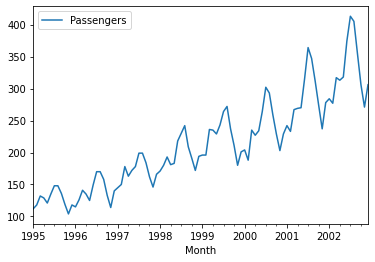

In [ ]:
df_airline.plot()

- There is an upward trending data and there is seasonality in our data.

Histogram

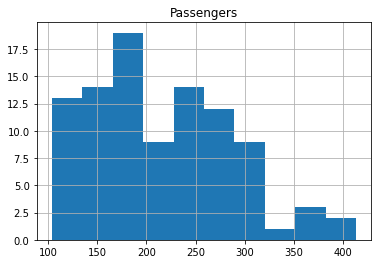

In [ ]:
df_airline.hist()
plt.show()

Distplot

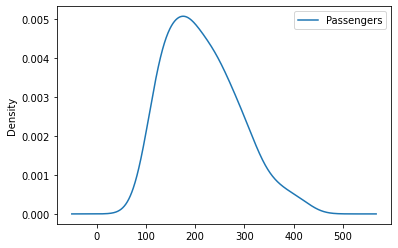

In [ ]:
df_airline.plot(kind='kde')
plt.show()

- We can observe this a normally distributed data.

Lagplot

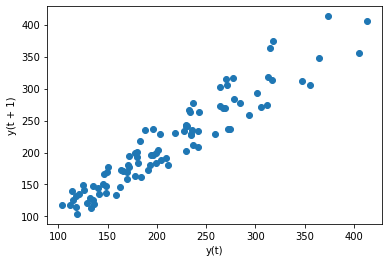

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df_airline)

In [166]:
airline=pd.read_excel('/content/Airlines+Data.xlsx')
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [167]:
#Get month and year columns in our data

airline["month"] = airline.Month.dt.strftime("%b") # month extraction
airline["year"] = airline.Month.dt.strftime("%Y") # year extraction
airline.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


Heatmap

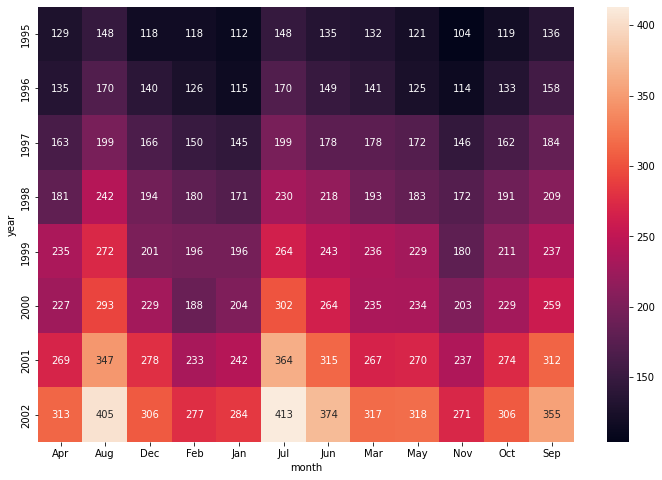

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airline,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

- Years 2000 and after have higher number of passengers.
- Months Jul and Aug fairly high passengers and months Nov and Dec have lower passengers tarvelling. 

Boxplot

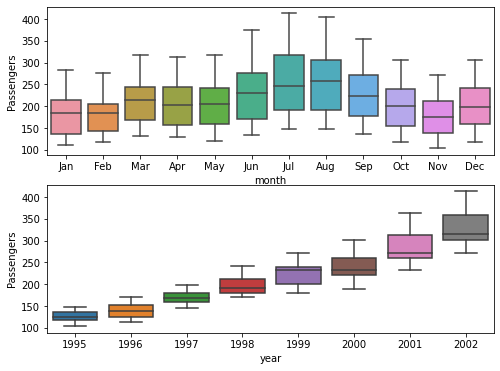

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airline)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airline)

- Similar observations can be concluded from boxplot as well.

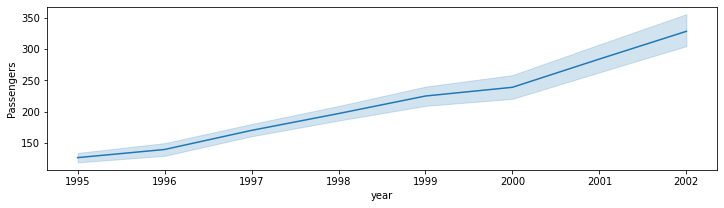

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airline)

ACF Plot

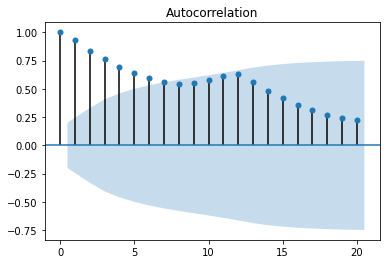

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(airline["Passengers"])                                                   #q=6

PACF Plot

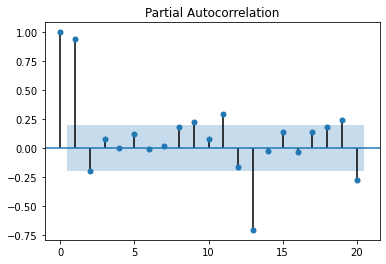

In [ ]:
pacf = plot_pacf(airline["Passengers"])                               #p=10

**Data Preprocessing**

In [ ]:
airline.shape

(96, 4)

In [168]:
airline

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [169]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


In [170]:
#Convert dtype of year 
airline['year'] = airline['year'].astype("int64")

In [171]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.1+ KB


**Creating dummy variables**

In [172]:
#OHE for month column
airline1 = pd.get_dummies(airline)
airline1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [173]:
x=np.arange(1,97)

In [174]:
#timesteps
t=pd.Series(data=x)
t

0      1
1      2
2      3
3      4
4      5
      ..
91    92
92    93
93    94
94    95
95    96
Length: 96, dtype: int64

In [175]:
#timesteps square values
t_sqr=pd.Series(data=(x*x))
t_sqr

0        1
1        4
2        9
3       16
4       25
      ... 
91    8464
92    8649
93    8836
94    9025
95    9216
Length: 96, dtype: int64

In [176]:
#log of number of passengers
airline1['log_passengers'] = np.log(airline1['Passengers'])

In [177]:
airline1['t'] = t

In [178]:
airline1['t_sqr'] = t_sqr

In [179]:
airline1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,log_passengers,t,t_sqr
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.718499,1,1
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.770685,2,4
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,4.882802,3,9
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.859812,4,16
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4.795791,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,6.003887,92,8464
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,5.872118,93,8649
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.723585,94,8836
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.602119,95,9025


**Split Train and Test data**

In [180]:
Train = airline1.head(84)
Test = airline1.tail(12)

**Model Building**

In [181]:
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

In [182]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()                                                              #Fit the train model
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                              #predict on test data   
mae_linear = MAE(Test['Passengers'],pred_linear)                                                                     #calculate eoot mean sqr error 
mae_linear

0.12875898544471487

In [183]:
#Exponential

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
mae_Exp = MAE(Test['Passengers'], np.exp(pred_Exp))
mae_Exp

0.11102459391986047

In [184]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
mae_Quad = MAE(Test['Passengers'],pred_Quad)
mae_Quad

0.11838168080316025

In [185]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
mae_add_sea = MAE(Test['Passengers'],pred_add_sea)
mae_add_sea

0.6601957591766386

In [186]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sqr+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','t','t_sqr']]))
mae_add_sea_quad = MAE(Test['Passengers'], pred_add_sea_quad)
mae_add_sea_quad

0.055710861779900894

In [188]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
mae_Mult_sea = MAE(Test['Passengers'], np.exp(pred_Mult_sea))
mae_Mult_sea

0.7218240575033881

In [189]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
mae_Mult_add_sea = MAE(Test['Passengers'], np.exp(pred_Mult_add_sea))
mae_Mult_add_sea 

0.024187475026051352

In [191]:
#Compare the results 

data = {"MODEL":pd.Series(["mae_linear","mae_Exp","mae_Quad","mae_add_sea","mae_add_sea_quad","mae_Mult_sea","mae_Mult_add_sea"]),"MAE_Values":pd.Series([mae_linear,mae_Exp,mae_Quad,mae_add_sea,mae_add_sea_quad,mae_Mult_sea,mae_Mult_add_sea])}
table_mae=pd.DataFrame(data)
table_mae.sort_values(['MAE_Values'])

,MODEL,MAE_Values
6,mae_Mult_add_sea,0.024187
4,mae_add_sea_quad,0.055711
1,mae_Exp,0.111025
2,mae_Quad,0.118382
0,mae_linear,0.128759
3,mae_add_sea,0.660196
5,mae_Mult_sea,0.721824


- We can see here ***Multiplicative Additive Seasonality*** giving us best results as the MAE is the lowest for this data. 

**Predict on new data**

In [ ]:
Test.to_csv('predict_data.csv')

In [ ]:
#We will try to predict the data for the whole yearr of 2022
predict_data = pd.read_csv('/content/predict_data.csv')
predict_data.head()

,Month,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_sqr
0,01-01-2022,2022,0,0,0,0,1,0,0,0,0,0,0,0,97,9409
1,01-02-2022,2022,0,0,0,1,0,0,0,0,0,0,0,0,98,9604
2,01-03-2022,2022,0,0,0,0,0,0,0,1,0,0,0,0,99,9801
3,01-04-2022,2022,1,0,0,0,0,0,0,0,0,0,0,0,100,10000
4,01-05-2022,2022,0,0,0,0,0,0,0,0,1,0,0,0,101,10201


In [ ]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      12 non-null     object
 1   year       12 non-null     int64 
 2   month_Apr  12 non-null     int64 
 3   month_Aug  12 non-null     int64 
 4   month_Dec  12 non-null     int64 
 5   month_Feb  12 non-null     int64 
 6   month_Jan  12 non-null     int64 
 7   month_Jul  12 non-null     int64 
 8   month_Jun  12 non-null     int64 
 9   month_Mar  12 non-null     int64 
 10  month_May  12 non-null     int64 
 11  month_Nov  12 non-null     int64 
 12  month_Oct  12 non-null     int64 
 13  month_Sep  12 non-null     int64 
 14  t          12 non-null     int64 
 15  t_sqr      12 non-null     int64 
dtypes: int64(15), object(1)
memory usage: 1.6+ KB


In [ ]:
#Convert Month column dtype to datetime64
predict_data['Month'] = predict_data['Month'].astype("datetime64[ns]")

In [ ]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      12 non-null     datetime64[ns]
 1   year       12 non-null     int64         
 2   month_Apr  12 non-null     int64         
 3   month_Aug  12 non-null     int64         
 4   month_Dec  12 non-null     int64         
 5   month_Feb  12 non-null     int64         
 6   month_Jan  12 non-null     int64         
 7   month_Jul  12 non-null     int64         
 8   month_Jun  12 non-null     int64         
 9   month_Mar  12 non-null     int64         
 10  month_May  12 non-null     int64         
 11  month_Nov  12 non-null     int64         
 12  month_Oct  12 non-null     int64         
 13  month_Sep  12 non-null     int64         
 14  t          12 non-null     int64         
 15  t_sqr      12 non-null     int64         
dtypes: datetime64[ns](1), int64(15)
memory usage: 

In [ ]:
#Build model on whole airline1 data with Multiplicative Additive Seasonality model
final_model = smf.ols('log_passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = airline1).fit()

In [ ]:
#this give us log_passengers 
pred_new  = pd.Series(final_model.predict(predict_data))
pred_new

0     5.770755
1     5.781280
2     5.924459
3     5.891606
4     5.885083
5     6.008926
6     6.115180
7     6.113063
8     6.002824
9     5.872713
10    5.742262
11    5.878809
dtype: float64

In [ ]:
#Get number of passengers
import math
passengers = []
for i in range(0,12):
  passengers.append(round(math.exp(pred_new[i]),0))

In [ ]:
predict_data["Passengers"] = passengers

In [ ]:
predict_data["forecasted_log_passengers"] = pd.Series(pred_new)

In [ ]:
predict_data

,Month,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_sqr,Passengers,forecasted_log_passengers
0,2022-01-01,2022,0,0,0,0,1,0,0,0,0,0,0,0,97,9409,321.0,5.770755
1,2022-01-02,2022,0,0,0,1,0,0,0,0,0,0,0,0,98,9604,324.0,5.781280
2,2022-01-03,2022,0,0,0,0,0,0,0,1,0,0,0,0,99,9801,374.0,5.924459
3,2022-01-04,2022,1,0,0,0,0,0,0,0,0,0,0,0,100,10000,362.0,5.891606
4,2022-01-05,2022,0,0,0,0,0,0,0,0,1,0,0,0,101,10201,360.0,5.885083
5,2022-01-06,2022,0,0,0,0,0,0,1,0,0,0,0,0,102,10404,407.0,6.008926
6,2022-01-07,2022,0,0,0,0,0,1,0,0,0,0,0,0,103,10609,453.0,6.115180
7,2022-01-08,2022,0,1,0,0,0,0,0,0,0,0,0,0,104,10816,452.0,6.113063
8,2022-01-09,2022,0,0,0,0,0,0,0,0,0,0,0,1,105,11025,405.0,6.002824
9,2022-01-10,2022,0,0,0,0,0,0,0,0,0,0,1,0,106,11236,355.0,5.872713


- So this our predicted airline passengers data for whole year 2022.

- As we observed in various plots that Aug & Sept have fairly high passengers, we can observe a similar trend in predict data as well. 

- Just to reflect accuracy of our model by plot 👇

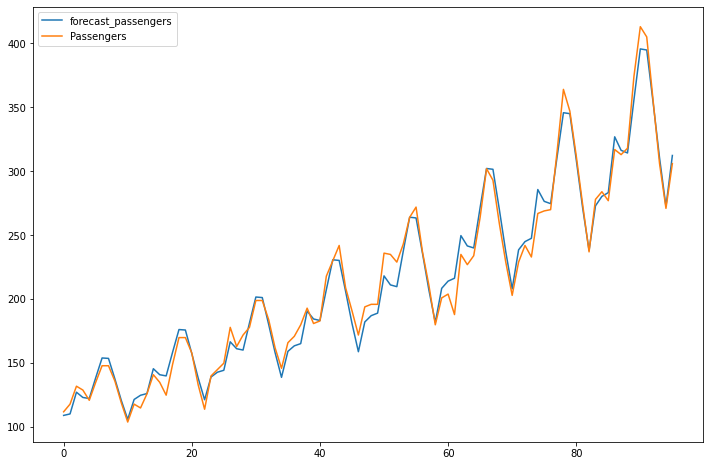

In [192]:
airline1['forecast_passengers']=np.exp(pd.Series(final_model.predict(airline1)))
airline1[['forecast_passengers','Passengers']].plot(figsize=(12,8))

# **Forecasing by Data driven Model**

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

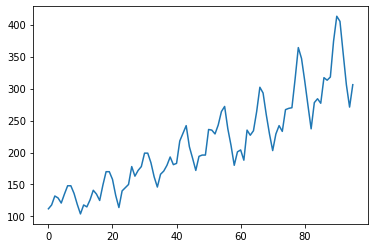

In [137]:
airline = pd.read_excel("/content/Airlines+Data.xlsx")
airline.Passengers.plot()

In [138]:
Train = airline.head(84)
Test = airline.tail(12)

**Moving Average**

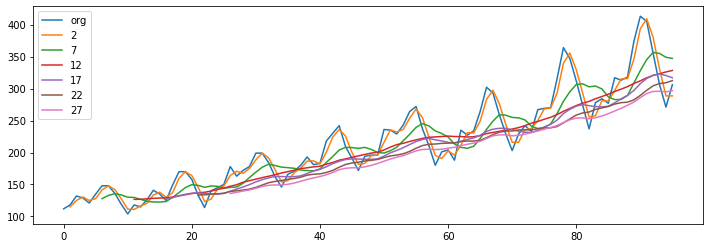

In [140]:
#Smoothning of the graph
plt.figure(figsize=(12,4))
airline.Passengers.plot(label="org")
for i in range(2,30,5):
    airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

**Time series decomposition plot**

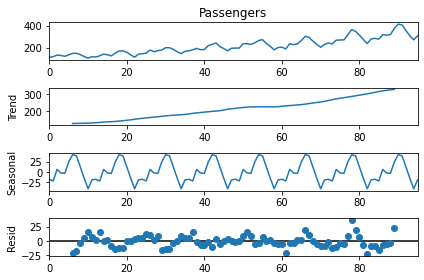

In [141]:
decompose_ts_add = seasonal_decompose(airline.Passengers,period=12)
decompose_ts_add.plot()
plt.show()                                           #1st is the original plot, 2nd in the trend, 3rd is the seaonality component, 4th is the noise component

**Evaluation Metric MAE**

In [149]:
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

**Simple Exponential Method**

In [150]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAE(pred_ses,Test.Passengers) 

0.1341127474051382

**Holt method**

In [151]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAE(pred_hw,Test.Passengers) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  


0.23530719652100632

**Holts winter exponential smoothing with additive seasonality and additive trend**

In [152]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAE(pred_hwe_add_add,Test.Passengers) 

0.05499858437809377

**Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [153]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAE(pred_hwe_mul_add,Test.Passengers)

0.028211184081344768

**Final Model by combining train and test**

In [154]:
hwe_model_mul_add = ExponentialSmoothing(airline["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


**Comparison of forcasted model and actual data**

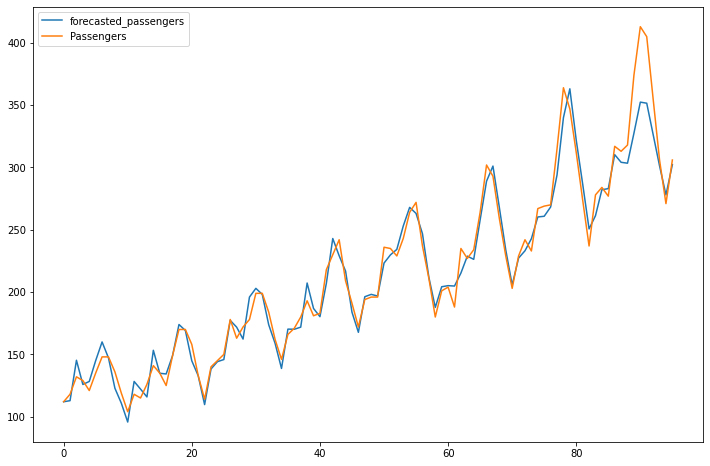

In [157]:
airline['forecasted_passengers']=hwe_model_add_add.predict(start = airline.index[0],end = airline.index[-1])
airline[['forecasted_passengers','Passengers']].plot(figsize=(12,8))

In [155]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

84    282.165871
85    283.021846
86    310.306974
87    304.163722
88    303.449567
89    327.449708
90    352.449735
91    351.592793
92    326.449910
93    301.307326
dtype: float64